In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

%matplotlib inline

In [28]:
df2 = pd.read_csv('songs_data_2.csv', header=0)  # , dtype=str)
df2.head()
df2.isnull().sum()

Artist              0
Song                0
Year                0
Popularity          0
Track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [29]:
matplotlib.style.use('default')

<AxesSubplot:xlabel='energy', ylabel='Popularity'>

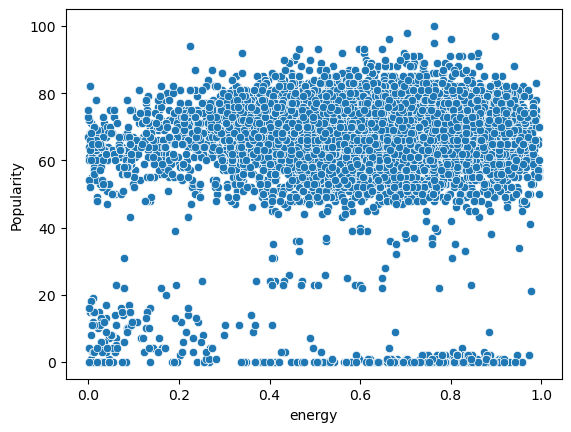

In [30]:
sns.scatterplot(data=df2, x='energy', y='Popularity')

### Something may looked weird here for me. 
### It seems popularity was stored as strings.
### I'll switch it to intergers.
### <br>
### This may be different if you loaded a csv but you can still run this code.

In [31]:
df2['Popularity'] = df2['Popularity'].apply(int)

### Create plots of populatity vs all of the audio features.

<AxesSubplot:xlabel='energy', ylabel='Popularity'>

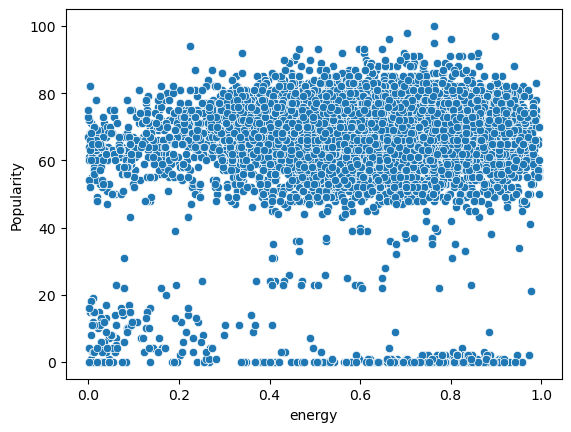

In [32]:
sns.scatterplot(data=df2, x='energy', y='Popularity')

<AxesSubplot:xlabel='danceability', ylabel='Popularity'>

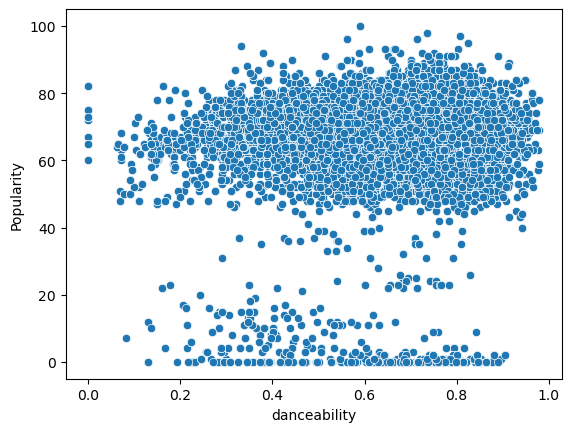

In [33]:
sns.scatterplot(data=df2, x='danceability', y='Popularity')

<AxesSubplot:xlabel='loudness', ylabel='Popularity'>

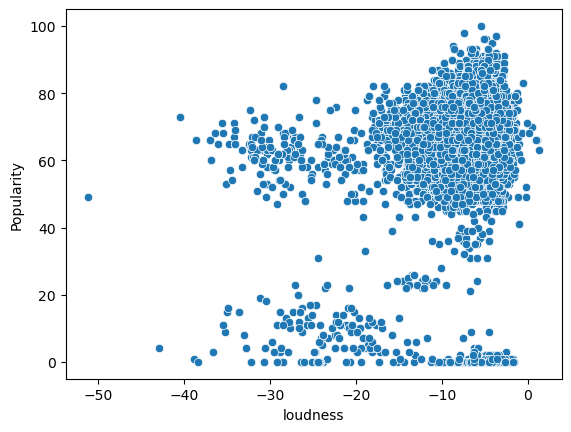

In [34]:
sns.scatterplot(data=df2, x='loudness', y='Popularity')

<AxesSubplot:xlabel='instrumentalness', ylabel='Popularity'>

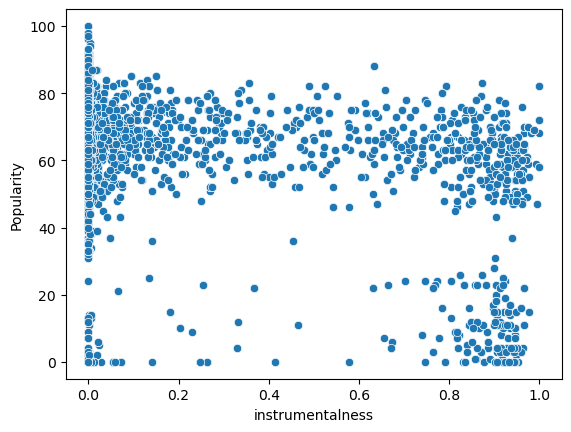

In [35]:
sns.scatterplot(data=df2, x='instrumentalness', y='Popularity')

<AxesSubplot:xlabel='tempo', ylabel='Popularity'>

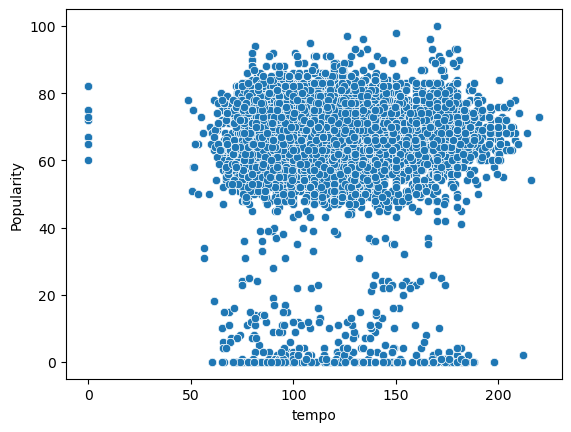

In [36]:
sns.scatterplot(data=df2, x='tempo', y='Popularity')

<AxesSubplot:xlabel='liveness', ylabel='Popularity'>

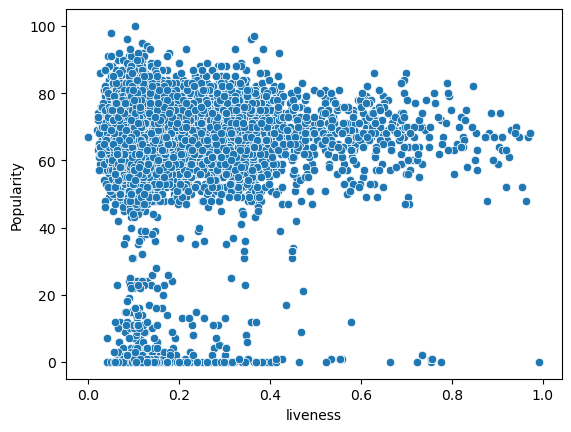

In [37]:
sns.scatterplot(data=df2, x='liveness', y='Popularity')

<AxesSubplot:xlabel='duration_ms', ylabel='Popularity'>

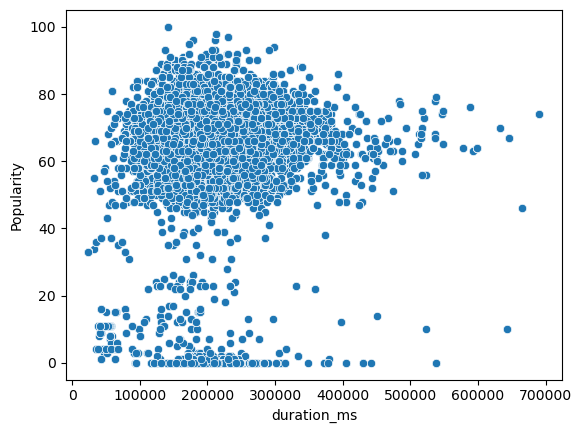

In [38]:
sns.scatterplot(data=df2, x='duration_ms', y='Popularity')

### To my eye it seems there are three groupings of popularity:
###   - the largest is above around 30,
###   n between 30 and 10,
###   - and finally below 5. 

<br>

### Will removing one or both of these groups help the model?
### Or removing them leave out important information?

<AxesSubplot:xlabel='Popularity', ylabel='Count'>

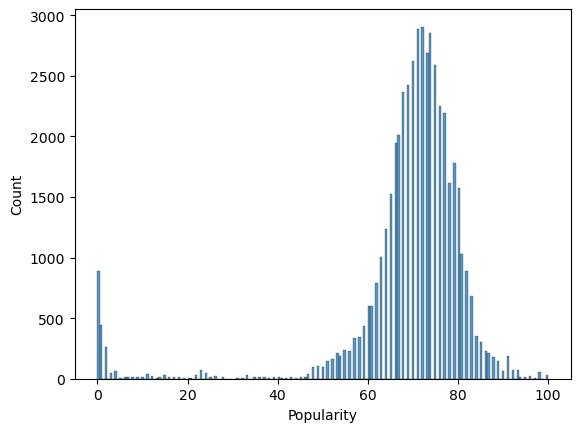

In [39]:
sns.histplot(df2['Popularity'])
# There's many below 5 but most are above 40.

In [40]:
# Check the correlation between Popularity and all of the features.
print(df2.corr()['Popularity'])

Year               -0.090802
Popularity          1.000000
danceability        0.018599
energy              0.036883
key                -0.000107
loudness            0.150888
mode                0.028069
speechiness        -0.019478
acousticness       -0.097674
instrumentalness   -0.213609
liveness           -0.018357
valence            -0.076698
tempo              -0.015697
duration_ms         0.054276
time_signature      0.015694
Name: Popularity, dtype: float64


In [41]:
df2.head()

,Artist,Song,Year,Popularity,Track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cage The Elephant,Cigarette Daydreams,2013,79,0lkQOB949M2gLyut86aJ1b,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,208760,4
1,Grimes,Kill V. Maim,2015,65,3WXhshrs1fzwF3rQE399Gq,0.578,0.947,11,-2.431,0,0.0359,0.00744,0.081600,0.1050,0.456,134.033,246007,4
2,K CAMP,Comfortable,2014,66,2BqQQXuBOuhaWeUP7okEx0,0.765,0.412,7,-8.932,0,0.0726,0.72000,0.000000,0.1260,0.632,109.986,211573,4
3,Stunna 4 Vegas,UP THE SMOKE (with Offset),2020,62,3faAAUxohrxqYhPlneZ3XV,0.899,0.735,4,-7.719,1,0.4000,0.05060,0.000000,0.1500,0.884,143.001,188107,4
4,Tracy Chapman,Give Me One Reason,1995,68,4vDBJeeQCbhP9FaPPMsYkY,0.608,0.419,11,-10.016,1,0.0331,0.60200,0.000008,0.1080,0.602,100.220,268333,4


## Start the modeling here.

In [42]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

### Drop unnecessary or non-numeric columns.
### Convert the features to float just to make sure.
###     <br>
### Is leaving the year in data leakage? Newer songs will usually be more popular?
### Could solve this by only looking at songs from a certain period (e.g. a decade).

In [64]:
scale = MinMaxScaler()
df3 = df2.drop(['Artist', 'Song', 'time_signature', 'Popularity', 'Track_id'], axis=1)
X = scale.fit_transform(df3)
X = pd.DataFrame(data=X, columns=df3.columns)
print(X.head())

y = df2['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

       Year  danceability    energy       key  loudness  mode  speechiness  \
0  0.898734      0.648980  0.678708  0.181818  0.908711   1.0     0.027568   
1  0.924051      0.589796  0.950802  1.000000  0.927979   0.0     0.037631   
2  0.911392      0.780612  0.413643  0.636364  0.804082   0.0     0.076101   
3  0.987342      0.917347  0.737947  0.363636  0.827200   1.0     0.419287   
4  0.670886      0.620408  0.420671  1.000000  0.783423   1.0     0.034696   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  
0      0.081024          0.000000  0.083686  0.275758  0.517858     0.277106  
1      0.007470          0.081600  0.105740  0.460606  0.608967     0.332972  
2      0.722892          0.000000  0.126888  0.638384  0.499711     0.281325  
3      0.050803          0.000000  0.151057  0.892929  0.649712     0.246130  
4      0.604418          0.000008  0.108761  0.608081  0.455341     0.366458  


## Start with a decision tree regressor and then compare to different models.

In [57]:
from sklearn.tree import DecisionTreeRegressor


In [73]:
rtree = DecisionTreeRegressor()
rtree.fit(X_train, y_train)
dt_pred = rtree.predict(X_test)
dt_train = rtree.predict(X_train)

In [75]:
print('Decision Tree results:')
print('R2:', metrics.r2_score(y_test, dt_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, dt_train)))

Decision Tree results:
R2: 0.9304154382666975
RMSE Test: 4.130416840309495
RMSE Train: 0.10376065177079452


Text(0, 0.5, 'Predicted Y')

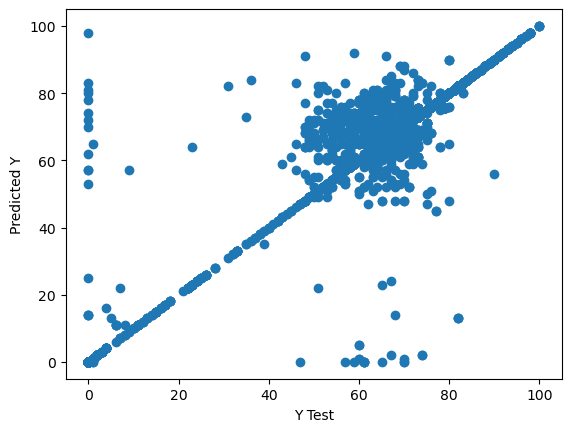

In [76]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

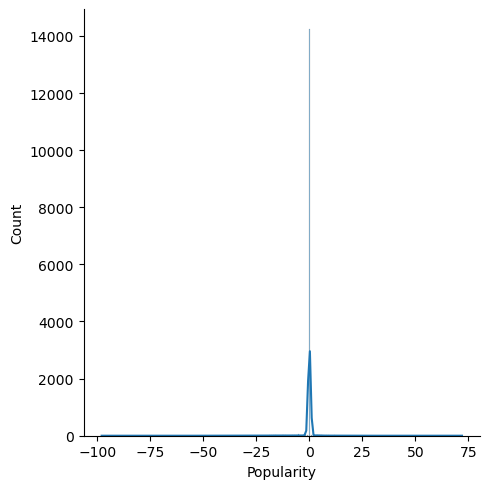

In [77]:
ax = sns.displot((y_test-dt_pred), bins=500, kde=True)

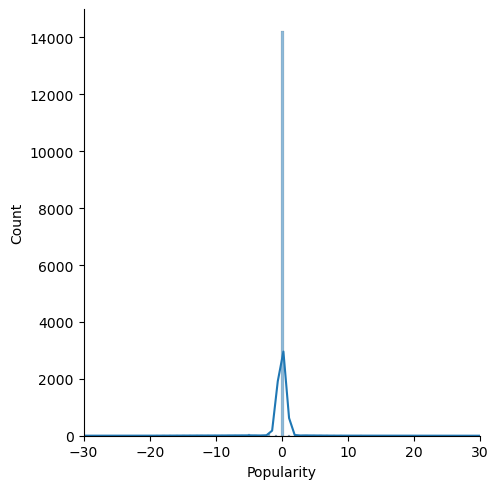

In [78]:
ax = sns.displot((y_test-dt_pred), bins=500, kde=True)
ax.set(xlim=(-30, 30), ylim=(0,15000))

Feature: 0, Score: 0.08566
Feature: 1, Score: 0.09477
Feature: 2, Score: 0.08854
Feature: 3, Score: 0.02197
Feature: 4, Score: 0.09404
Feature: 5, Score: 0.00449
Feature: 6, Score: 0.05554
Feature: 7, Score: 0.09222
Feature: 8, Score: 0.10405
Feature: 9, Score: 0.05744
Feature: 10, Score: 0.10262
Feature: 11, Score: 0.06897
Feature: 12, Score: 0.12966


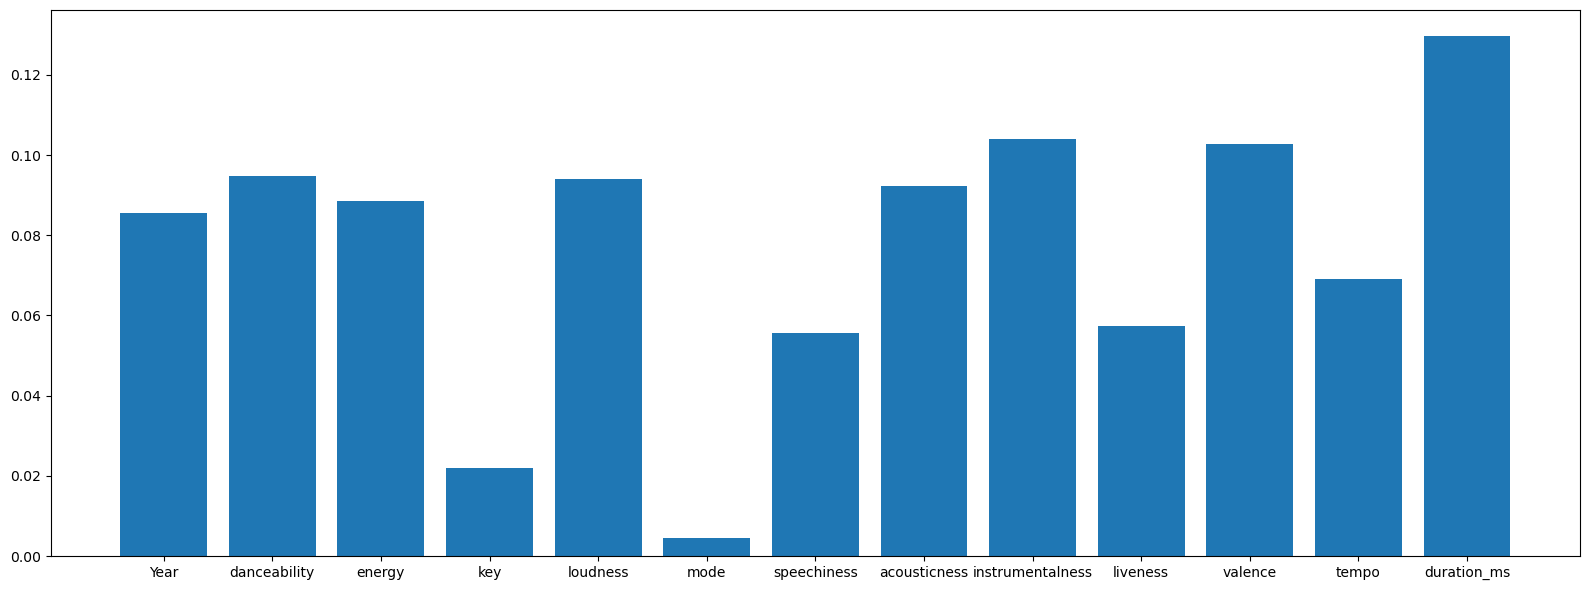

In [79]:
importance = rtree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig = plt.figure(figsize=(16,6))
plt.bar([x for x in X.columns], importance)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_train = rfr.predict(X_train)

In [82]:
print('Random forest results:')
print('R2:', metrics.r2_score(y_test, rfr_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, rfr_train)))
# base_accuracy = evaluate(rfr, X_test, y_test)

Random forest results:
R2: 0.95788215323562
RMSE Test: 3.2134423627979194
RMSE Train: 1.171853088832892


Text(0, 0.5, 'Predicted Y')

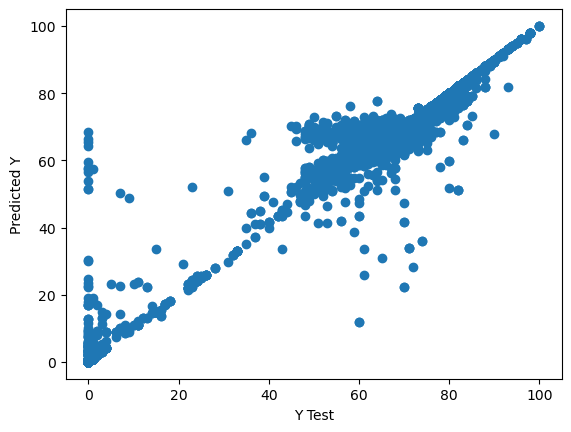

In [83]:
plt.scatter(y_test, rfr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

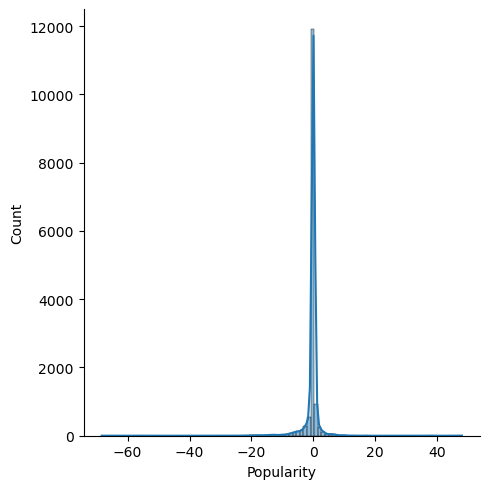

In [84]:
ax = sns.displot((y_test-rfr_pred), bins=100, kde=True)

Feature: 0, Score: 0.08600
Feature: 1, Score: 0.08255
Feature: 2, Score: 0.09522
Feature: 3, Score: 0.02739
Feature: 4, Score: 0.08847
Feature: 5, Score: 0.00702
Feature: 6, Score: 0.05984
Feature: 7, Score: 0.08199
Feature: 8, Score: 0.10185
Feature: 9, Score: 0.05223
Feature: 10, Score: 0.10946
Feature: 11, Score: 0.09279
Feature: 12, Score: 0.11518


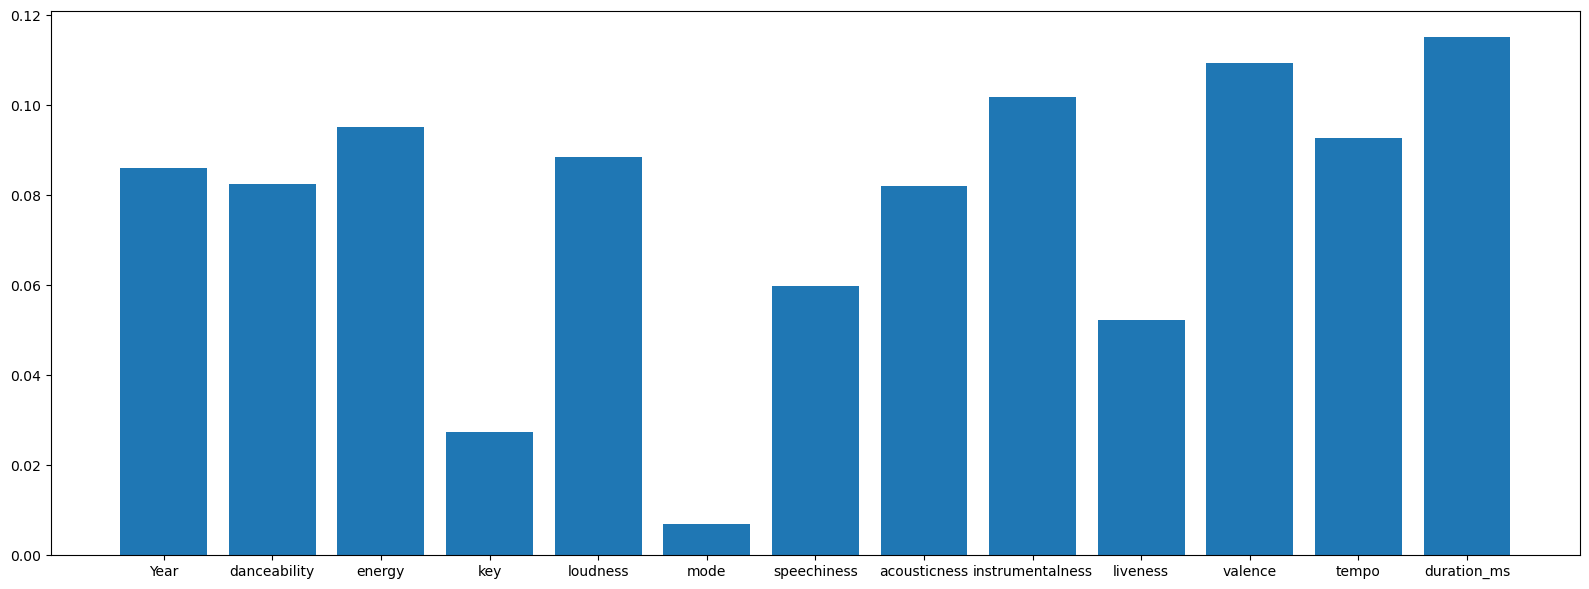

In [85]:
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig = plt.figure(figsize=(16,6))
plt.bar([x for x in X.columns], importance)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


## Comparison of random forest and decision tree feature importances shows they are quite similar.
## It's possible that there is less overfitting for the RFR.
## Decision tree has a very low training error and higher test error than RFR
## Could test for this by varying parameters and plotting Train vs Test RMSE. 
## <br>
## Year is the most important for both of these with mode being the lowest.
## Random Forest gave the best fit followed by XGBoost (see the dedicated XGB notebook) and then Decision Tree. 
## RF and DT gave similar results for the feature importance.
## <br>
## It would likely be possible to get a better fit with XGB by opitimizing the hyperparamters - 
## (See the XBG notebook.. not that much better than RF)
## <br>
## Therefore, I continued with only Random Forest.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [88]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    r2 = metrics.r2_score(test_labels, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    print('Model Performance')
    print(f'RMSE: {rmse}')
    print(f'R2 = {r2}')
    
    return rmse

In [43]:
base_model = RandomForestRegressor(n_estimators = 100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}% in RMSE.'.format(100 * (base_accuracy - random_accuracy) / base_accuracy))


[71 81 71 ... 75 60 78]
Model Performance
RMSE: 3.263552504976615
R2 = 0.9565583473162038
[71 81 71 ... 75 60 78]
Model Performance
RMSE: 2.7645546252940574
R2 = 0.9688272237633165
Improvement of 15.29% in RMSE.


In [50]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [None, 20, 55],
    'max_features': ['sqrt', 5, 6],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [300, 400, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, error_score='raise', 
                           cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [51]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}% in RMSE.'.format(100 * (base_accuracy - random_accuracy) / base_accuracy))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[71 81 71 ... 75 60 78]
Model Performance
RMSE: 2.7682705916243644
R2 = 0.9687433658884925
Improvement of -15.18%.


In [34]:
# grid_search.best_params_
print(params)

{'bootstrap': False, 'max_depth': 55, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [86]:
params = {'bootstrap': False, 'max_depth': 55, 'max_features': 'sqrt', 
          'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

In [89]:
final_model = RandomForestRegressor(**params)
final_model.fit(X_train, y_train)
final_accuracy = evaluate(final_model, X_test, y_test)

Model Performance
RMSE: 2.753013464426419
R2 = 0.969086953889565


In [91]:
final_pred = final_model.predict(X_test)
final_train = final_model.predict(X_train)
print('Final Random forest results:')
print('R2:', metrics.r2_score(y_test, final_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, final_train)))

Final Random forest results:
R2: 0.969086953889565
RMSE Test: 2.753013464426419
RMSE Train: 0.10376112962146139


## This is likely overfit now. 

## The inital RFR model is unlikely to overfit the data while the grid search model seems to be overfitting the data.

## Appendix: Method to test for overfitting in a model.

In [ ]:
param_range = np.arange(2, 50)  # [None, 1, 2, 3, 4]  # np.linspace(0, 2)  #  np.arange(2, 20)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(),
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    scoring="r2",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DT")
# plt.xlabel(r"min_sample_split")
plt.ylabel("Score")
# plt.ylim(0.0, 1.1)``
lw = 2

param_range[0] = 0 # Use this to plot None as the first element.

plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

### The best model parameters are:*
### min_samples_split = 4
### min_samples_leaf = 1
### min_weight_fraction_leaf = 0
### max_leaf_nodes = None
### ccp_alpha = 0
### max_depth = 0
### <br>
#### *Can only vary one of these parameters at a time so the full parameter range is not tested.